In [19]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
raw_data = pd.read_table('Driven Data Blood Donation.csv', sep=',', header=0)

In [4]:
raw_data.head()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [10]:
raw_data.describe()

,ID,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [15]:
#Renaming the column titles so .methods can be performed
raw_data.rename(columns={'Months since Last Donation': 'months_since_last_donation', 'Number of Donations': 'number_of_donations', 'Total Volume Donated (c.c.)': 'total_volume_donated', 'Months since First Donation': 'months_since_first_donation', "Made Donation in March 2007": 'made_donation_in_march_2007'}, inplace=True)

In [18]:
raw_data.head()

,ID,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


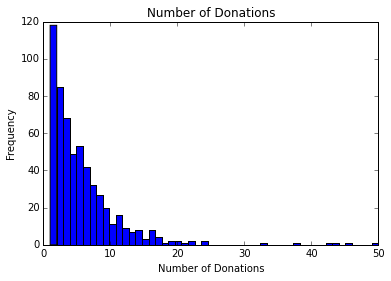

In [23]:
raw_data.number_of_donations.plot(kind='hist', bins=50, title='Number of Donations')
plt.xlabel('Number of Donations')
plt.ylabel('Frequency')
#Number of donations looks like a negative, hyperbolic equation

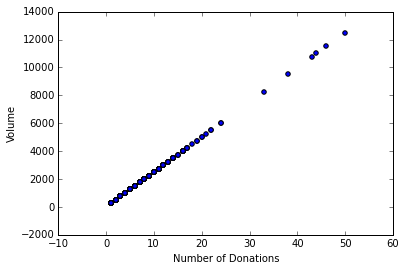

In [24]:
raw_data.plot(kind='scatter', x='number_of_donations', y='total_volume_donated')
plt.xlabel('Number of Donations')
plt.ylabel('Volume')
#Perfectly linear, so all donations are the same amount

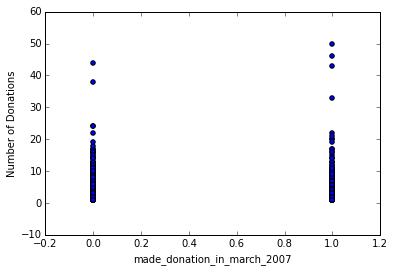

In [55]:
raw_data.plot(kind='scatter', y='number_of_donations', x='made_donation_in_march_2007')
plt.ylabel('Number of Donations')
plt.xlabel('made_donation_in_march_2007')
#maybe recent donors are more likely to have donated more

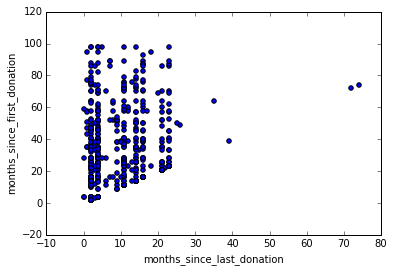

In [54]:
raw_data.plot(kind='scatter', x='months_since_last_donation', y='months_since_first_donation')
plt.xlabel('months_since_last_donation')
plt.ylabel('months_since_first_donation')

In [32]:
raw_data.groupby('made_donation_in_march_2007').mean()
#March07 donors are more likely to have donated more recently, donated more often, donated high volume
#But, their first donation date is about the same

,ID,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation
made_donation_in_march_2007,,,,,
0,368.933790,10.636986,4.716895,1179.223744,34.319635
1,390.224638,5.637681,7.681159,1920.289855,33.195652


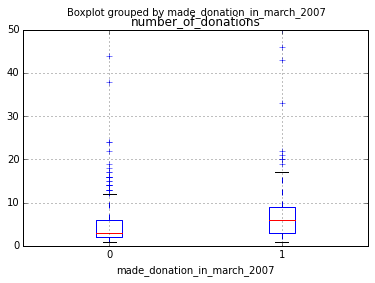

In [33]:
raw_data.boxplot(column='number_of_donations',by='made_donation_in_march_2007')
#Median, upper quartile are definitely higher for March07 donors

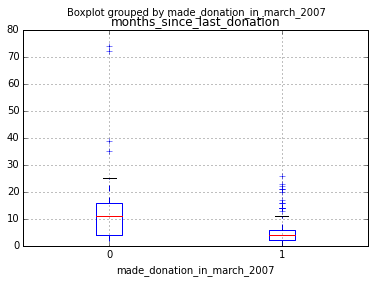

In [35]:
raw_data.boxplot(column='months_since_last_donation',by='made_donation_in_march_2007')
#March07 donors more likely to have fewer months since last donation, obviously
#Might be too close to be in the regression

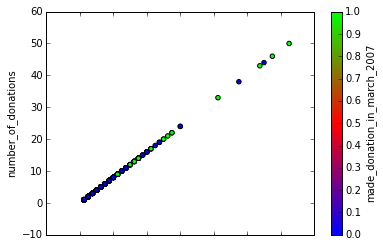

In [52]:
# scatter plot with Mar07 status colored
raw_data.plot(kind='scatter', y='number_of_donations', x='total_volume_donated', c='made_donation_in_march_2007', colormap='brg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11072a950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1118621d0>]], dtype=object)

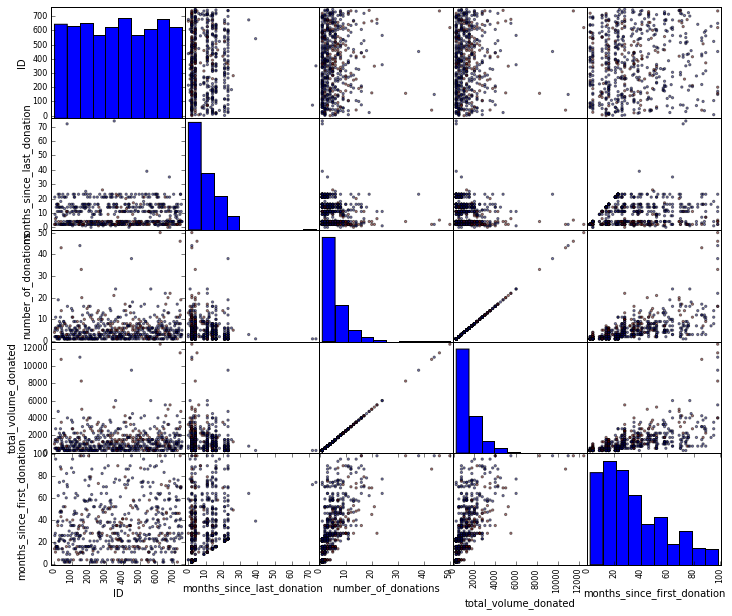

In [53]:
# scatter matrix of all features colored by Mar07 status
pd.scatter_matrix(raw_data.drop('made_donation_in_march_2007', axis=1), c=raw_data.made_donation_in_march_2007, figsize=(12, 10))

In [56]:
# As months since last donation increases, total volume decreases slightly - as does number of donations
# Months since first donation also appears to slightly increase


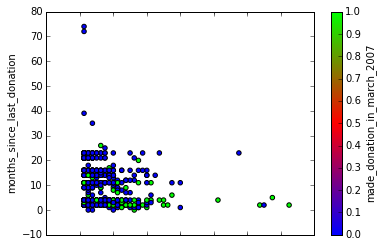

In [61]:
raw_data.plot(kind='scatter', y='months_since_last_donation', x='total_volume_donated', c='made_donation_in_march_2007', colormap='brg')

In [62]:
#Predicting
"""
def classify_donor(row):
    # calculate the petal_area
    petal_area = row[2] * row[3]
    
    # predict the species based on the rules above    
    if petal_area < 2:
        prediction = 'setosa'
    elif petal_area < 7.4:
        prediction = 'versicolor'
    else:
        prediction = 'virginica'
    
    # map the species name to a numeric value
    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}
    
    # return that value
    return species_to_num[prediction]

iris['prediction'] = [classify_iris(row) for index, row in iris.iterrows()]
"""

"\ndef classify_donor(row):\n    # calculate the petal_area\n    petal_area = row[2] * row[3]\n    \n    # predict the species based on the rules above    \n    if petal_area < 2:\n        prediction = 'setosa'\n    elif petal_area < 7.4:\n        prediction = 'versicolor'\n    else:\n        prediction = 'virginica'\n    \n    # map the species name to a numeric value\n    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}\n    \n    # return that value\n    return species_to_num[prediction]\n"

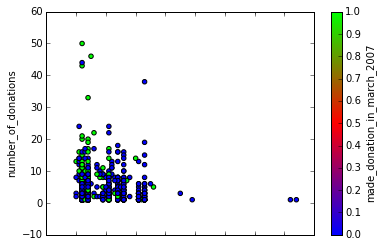

In [66]:
raw_data.plot(kind='scatter', x='months_since_last_donation', y='number_of_donations', c='made_donation_in_march_2007', colormap='brg')